#### https://online.stat.psu.edu/stat505/lesson/12

#### Introduction

Factor Analysis is to model observed variables and their covariance structure in terms of a smaller number of unobservable (latent) factors. <br><br>
latent = hidden

Factor Analysis is generally an exploratory/descriptive method that requires many subjective judgments.

Factor analysis is an inversion of PCA.<br>
In PCA, new variable is a LC of x-variables. <br>
In FA, x-variable is a LC of factors. <br>

Both are used to reduce dimensions

X: n x p <br>
$X_i$: n x 1
$$
X = \begin{bmatrix} X_{1} & X_{2} & ... & X_{p} \end{bmatrix}
$$

$\mu$: p x 1
$$
\mu = \begin{bmatrix} \mu_{1} & \mu_{2} & ... & \mu_{p} \end{bmatrix}^T
$$

F: n x m<br>     $f_i$: n x 1
$$
F = \begin{bmatrix} f_{1} & f_{2} & ... & f_{p} \end{bmatrix}
$$

L: p x m
$$
L = \begin{bmatrix} L_{11} & L_{12} & ... & L_{1m} \\
L_{21} & L_{22} & ... & L_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
L_{p1} & L_{p2} & ... & L_{pm}
\end{bmatrix}
$$

$$
X_1 = \mu_1 + L_{11} f_1 + L_{12} f_2 + ... + L_{1m} f_m + \epsilon_1
$$
Note that here $\mu_1$ and $\epsilon_1$ is n x 1

In the matrix form, 
$$
X_1 = \mu_1 + F L_1^T + \epsilon_1
$$

To put all x-variables into a matrix:
$$
X = \begin{bmatrix} X_{1} & X_{2} & ... & X_{p} \end{bmatrix} 
$$

$$
=
\begin{bmatrix} \mu_{1} & \mu_{2} & ... & \mu_{p} \end{bmatrix} + 
\begin{bmatrix} F L_1^T & F L_2^T & ... & F L_p^T \end{bmatrix} +
\begin{bmatrix} \epsilon_{1} & \epsilon_{2} & ... & \epsilon_{p} \end{bmatrix}
$$

In brief, 
$$
X = \mu + F L^T + \epsilon
$$

#### Quick Example & First method: Principal Components

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("places.txt", delim_whitespace=True, header=None, index_col=-1)

In [2]:
df.columns = ['climate', 'housing', 'health', 'crime', 'transportation', 'education', 'arts', 'recreation', 'economics']

In [3]:
df = df.apply(np.log10)
mu = df.mean()
std = df.std()

In [4]:
df2 = (df - mu)/std

In [37]:
evalues, evectors = np.linalg.eig(df2.cov())
indexes = np.argsort(evalues)
indexes = np.flip(indexes)
evalues = evalues[indexes]
evalues

array([3.297793  , 1.21356187, 1.10552987, 0.90727984, 0.86062869,
       0.5621858 , 0.48382061, 0.31807215, 0.25112816])

We pick first 3 evalues; use evalues and the corresponding evectors to calculate the factor loadings
$$
e_i \sqrt{\lambda_i}
$$

In [42]:
L = evectors[:, :3] * np.sqrt(evalues[:3]) * (-1)

In [43]:
L.shape

(9, 3)

In [47]:
result = pd.DataFrame(L)
result.index = df2.columns
result.columns = ['f1','f2','f3']
result

,f1,f2,f3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
transportation,0.680792,-0.155864,-0.148325
education,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreation,0.641790,0.321609,0.043967
economics,0.297846,0.595373,-0.533407


We should note that the factor loadings are the correlations between the factors and the variables. For example, the correlation between the Arts and the first factor is about 0.86. 

Interpreting factor loadings is similar to interpreting the coefficients for PCA.

We can use this formula to estimate factors, for ith observation:
$$
f_i = \begin{bmatrix} 
\frac{1}{\sqrt{\lambda_1}} e_1^T (X_i - \bar{X}) &
\frac{1}{\sqrt{\lambda_2}} e_2^T (X_i - \bar{X}) &
... &
\frac{1}{\sqrt{\lambda_m}} e_m^T (X_i - \bar{X}) \end{bmatrix}
$$

In [113]:
evectors[:3] @ df2.iloc[0,:] / np.sqrt(evalues[:3]) * (-1)

array([-0.74040554, -1.09088358,  0.6486517 ])

In [114]:
tmp = [evectors[:3] @ df2.iloc[i,:] / np.sqrt(evalues[:3]) * (-1) for i in range(df2.shape[0])]

In [115]:
F = pd.DataFrame(tmp)
F

,0,1,2
0,-0.740406,-1.090884,0.648652
1,0.481648,0.504169,-0.584818
2,-0.311560,1.119446,0.530939
3,0.532588,-1.649466,0.460439
4,0.589218,-0.878615,-0.692594
...,...,...,...
324,0.595942,0.389434,0.628679
325,-0.777981,0.325993,0.054410
326,-0.130617,1.293106,1.196338
327,0.136301,1.174572,0.031865


In [116]:
F @ L.T

,0,1,2,3,4,5,6,7,8
0,0.250581,-0.629850,-0.117612,-0.830544,-0.430244,0.010359,-0.504124,-0.797503,-1.216004
1,-0.315481,0.364586,0.164003,0.410966,0.336063,0.136929,0.349687,0.445549,0.755571
2,0.441712,-0.001373,-0.701313,0.509822,-0.465340,-0.847625,-0.390700,0.183412,0.290485
3,0.415211,0.157376,1.062637,-0.548747,0.551379,0.970584,0.653351,-0.168429,-1.069020
4,-0.479794,0.218599,0.812666,-0.275224,0.640808,0.906907,0.600050,0.065132,0.021827
...,...,...,...,...,...,...,...,...,...
324,0.728993,0.528361,0.271228,0.568731,0.251765,-0.056526,0.475302,0.535356,0.074015
325,-0.152743,-0.488540,-0.713759,-0.188439,-0.588524,-0.563807,-0.706316,-0.392065,-0.066653
326,1.066239,0.207272,-0.651377,0.775543,-0.467919,-1.012673,-0.247259,0.384646,0.092841
327,0.154689,0.277942,-0.380290,0.681931,-0.095008,-0.525491,-0.017444,0.466630,0.722907


In [117]:
error_matrix = df2.values - F @ L.T

In [118]:
import seaborn as sns

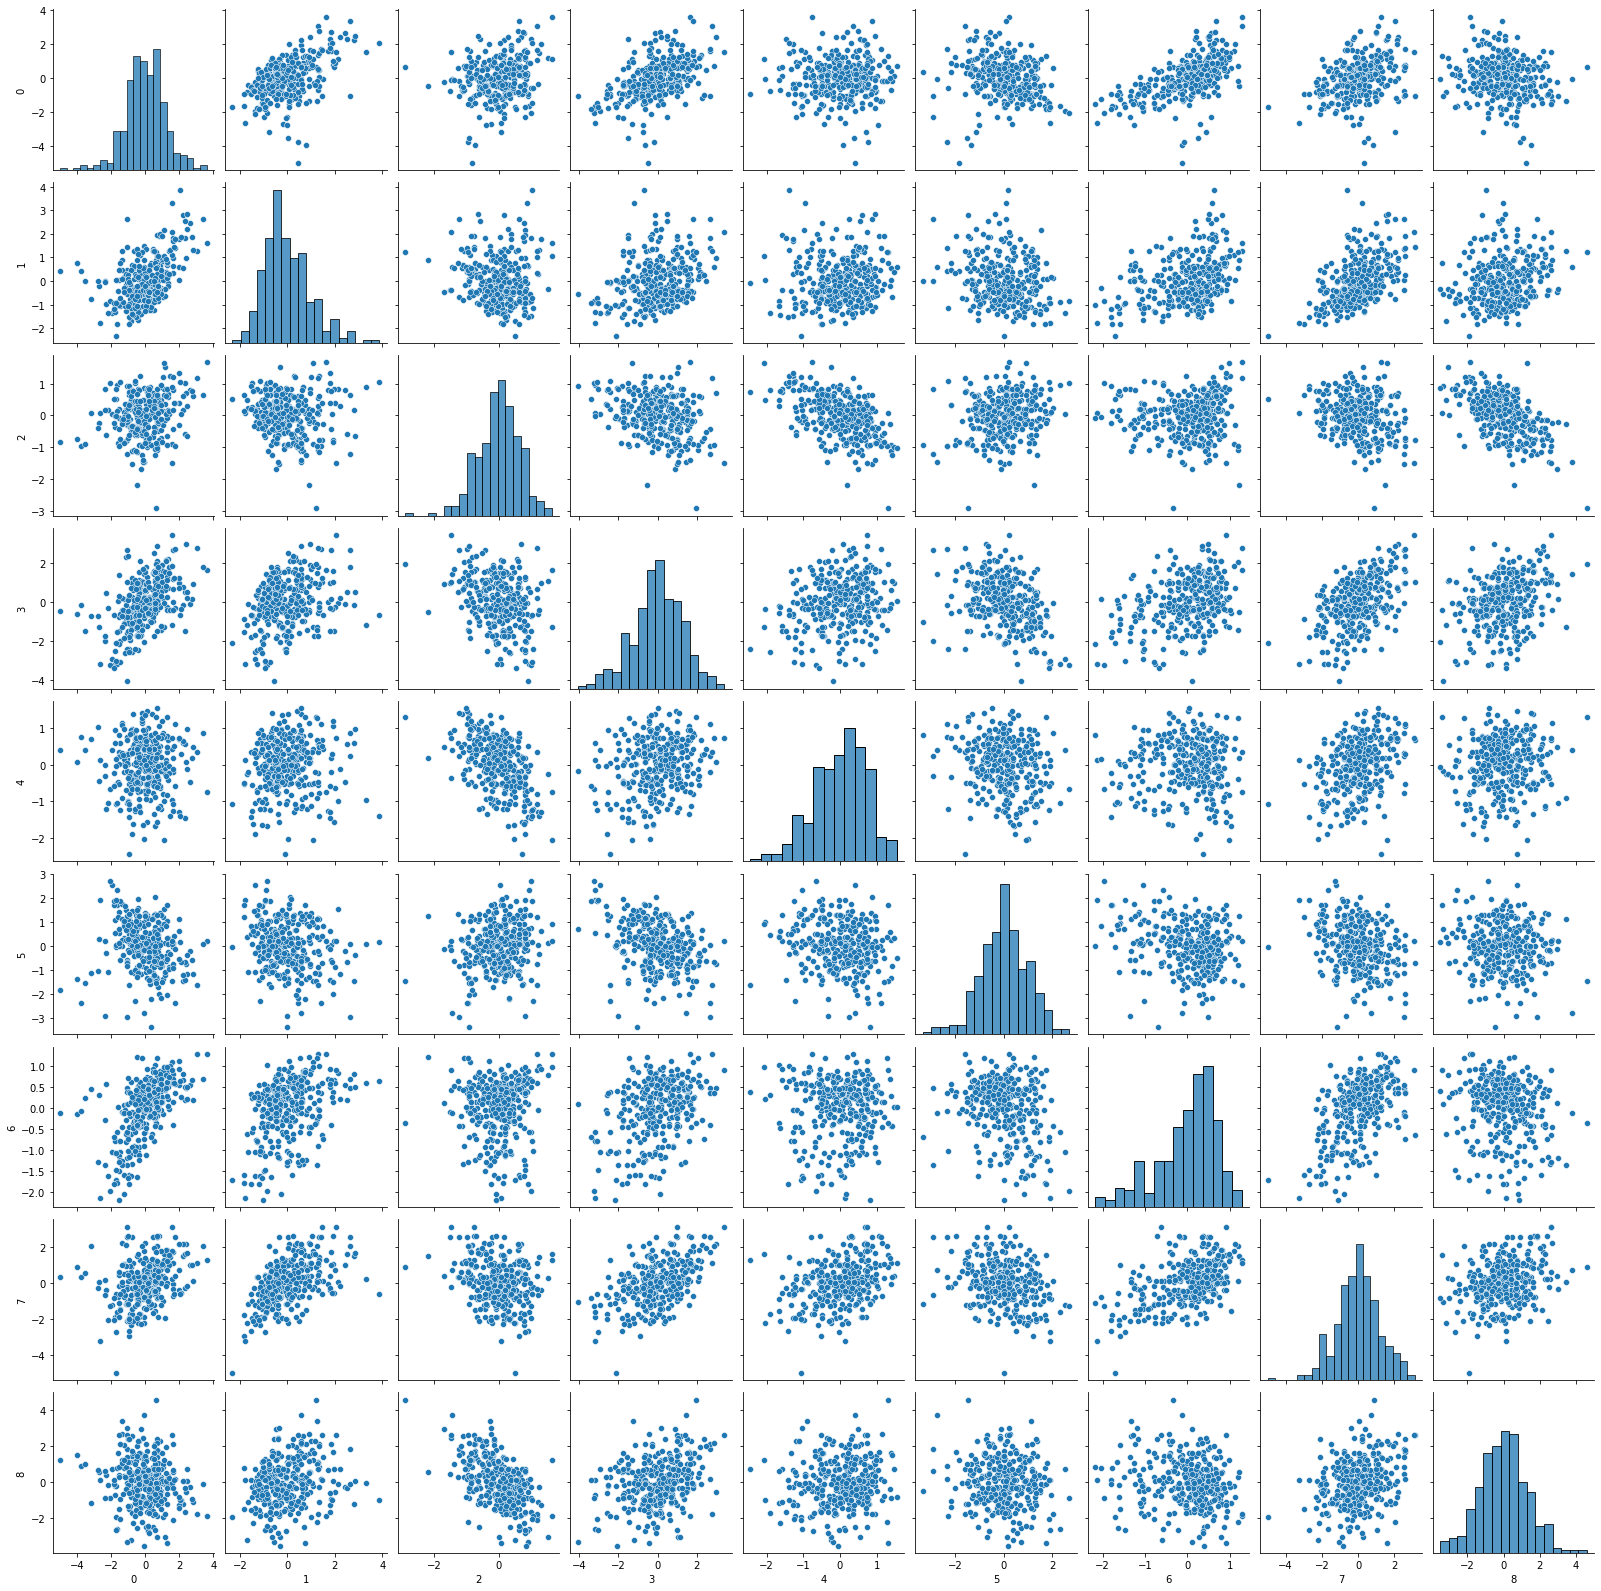

In [119]:
sns.pairplot(error_matrix)

#### Communalities

The communalities for the ith variable is the sum of the squared loadings for that variable.
$$
h_i^2 = \sum_{j=1}^m L_{ij}^2
$$

For example, the communality for Climate is:

In [48]:
result

,f1,f2,f3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
transportation,0.680792,-0.155864,-0.148325
education,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreation,0.641790,0.321609,0.043967
economics,0.297846,0.595373,-0.533407


In [51]:
result.loc['climate']

f1    0.286819
f2    0.075603
f3    0.840848
Name: climate, dtype: float64

In [50]:
np.square(result.loc['climate']).sum()

0.7950070651104929

We can compute communalities for all original variables

In [54]:
communalities_result = result.apply(lambda row: np.square(row).sum(), axis=1)

In [55]:
communalities_result

climate           0.795007
housing           0.517832
health            0.722302
crime             0.512449
transportation    0.509772
education         0.560739
arts              0.753821
recreation        0.517259
economics         0.727704
dtype: float64

In [56]:
communalities_result.sum()

5.616884741577942

You can think of these values as multiple R2 values for regression, using the 3 factors to explain the original variables. Here it shows that if we perform multiple LR of climate against the 3 factors, we obtain R2 = 0.795; Our three factors does the best job of explaining variation in climate, the arts, economics, and health.

The total communality is equal to the sum of selected eigenvalues. This is the percentage of variation explained in our model

In [59]:
communalities_result.sum()

5.616884741577942

In [58]:
sum(evalues)

9.0

In [61]:
5.616884741577942 / 9.0

0.6240983046197713

Because the data are standardized, the variance for the standardized data is 0. The specific variances are computed by subtracting the communality from the variance:
$$
\Psi_i = 1 - h_i^2
$$

For example, the specific variance of climate is:
$$
\Phi_1 = 1 - 0.795 = 0.205
$$

In [62]:
communalities_result['climate']

0.7950070651104929

We can also obtain the expected correlation matrix. Generally, these residuals shuold be as close to zero as possible. For example, the residual corr between Housing and Climate is -0.00924, which is very close to 0; however, some pairs are not good enough.

In [74]:
expected_corr = pd.DataFrame(L @ L.T)

In [75]:
actual_corr = df2.corr()

In [76]:
residual_corr = pd.DataFrame(actual_corr.values - expected_corr.values)
residual_corr.index = df2.columns
residual_corr.columns = df2.columns
residual_corr

,climate,housing,health,crime,transportation,education,arts,recreation,economics
climate,0.204993,-0.009239,-0.014759,-0.060271,-0.037202,0.185367,-0.075176,-0.124752,0.217347
housing,-0.009239,0.482168,-0.023175,-0.280633,-0.121191,-0.048034,-0.075521,-0.040321,0.042489
health,-0.014759,-0.023175,0.277698,0.050074,-0.154802,-0.115369,-0.009291,-0.091075,0.065273
crime,-0.060271,-0.280633,0.050074,0.487551,0.054968,0.115623,0.000087,-0.183773,-0.102882
transportation,-0.037202,-0.121191,-0.154802,0.054968,0.490228,-0.143177,-0.054394,0.010407,-0.126411
education,0.185367,-0.048034,-0.115369,0.115623,-0.143177,0.439261,-0.135155,-0.055310,0.141972
arts,-0.075176,-0.075521,-0.009291,0.000087,-0.054394,-0.135155,0.246179,-0.019258,-0.046870
recreation,-0.124752,-0.040321,-0.091075,-0.183773,0.010407,-0.055310,-0.019258,0.482741,-0.183265
economics,0.217347,0.042489,0.065273,-0.102882,-0.126411,0.141972,-0.046870,-0.183265,0.272296


One disadvantage of this principal component method is that it does not provide a test of lack of fit. Such test is available for the Maximum Likelihood method.

#### Model Assumptions

The specific factors $\epsilon_i$ has mean 0, $var(\epsilon_i)=\psi_i$

The common factors $f_i$ has mean 0, $var(f_i) = 1$

The specific factors are uncorrelated with one another; the common factors are uncorrelated with one another; the specific factors are uncorrelated with the common factors.

Recall that we have 
$$
X = \mu + F L^T + \epsilon
$$

$$
var(X) = \Sigma = L L^T+ \Psi
$$

#### Ambiguity

F matrix is not unique. For example, let T be any m x m orthogonal matrix.
$$
T^T T = T T^T = I
$$

$$
X = \mu + F L^T + \epsilon = \mu + F T T^T L^T + \epsilon = \mu + F^* L^{*T} + \epsilon
$$

So we can have $F^* = F T$ that fits equally well. There's an infinite number of orthogonal matrices, then there's an infinite number of alternative models. 

This ambiguity is imporatnt to justify a **factor rotation**

#### Factor Rotations

From the above example, it does not look like the factor model works well. There's no guarantee that any model will fit the data well.

The first motivation of factor analysis was to try to discern some underlying factors describing the data. Let's revisit the factor loadings obtained from the principal component method.

In [80]:
result

,f1,f2,f3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
transportation,0.680792,-0.155864,-0.148325
education,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreation,0.641790,0.321609,0.043967
economics,0.297846,0.595373,-0.533407


The problem is that, some variables are important in more than one factor. For instance, Education is significant in Factor 1 & 2. It makes interpretation of the data difficult. Further, it can even give a contradictory result. High F1 suggests high quality education, while High F2 means poor education.

Factor rotation is motivated by the fact that factor models are not unique. 

We plan to find an appropriate rotation, defined through an orthogonal matrix T, to yield the most easily interpretable factors.

Let's do a scatter plot between f1 and f2: we can use the orthogonal matrix T to rotate this plot. We wish to find a rotation such that each of the p variables has a high loading on only one factor; we want dots stay close to axes.

<AxesSubplot:xlabel='f2', ylabel='f1'>

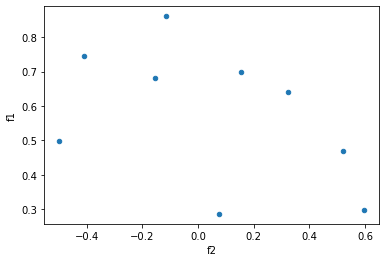

In [83]:
result.plot.scatter('f2','f1')

Varimax rotation is the most common. It involves scaling the loadings by dividng them by the corresponding communality:
$$
L_{ij}^* = L_{ij} \div h_i
$$

Varimax rotation finds the rotation that maximizes the quantity below. This is the sample variances of the standardized loadings for each factor summed over the m factors.

In [91]:
from IPython.display import Image

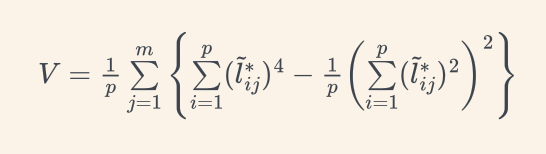

In [92]:
Image("varimax_formula.png", width=300, height=300)

Construct the matrix T (I don't know how to get that..)

In [93]:
T = np.matrix([
    [0.78062, 0.60779, 0.14570],
    [-0.59614, 0.79408, -0.11859],
    [-0.18777, 0.00571, 0.98220]
])

In [94]:
T @ T.T

matrix([[ 1.00000476e+00, -3.48660000e-06,  3.50000000e-09],
        [-3.48660000e-06,  1.00000953e+00, -7.69340000e-06],
        [ 3.50000000e-09, -7.69340000e-06,  1.00000702e+00]])

In [101]:
print("Rotated Factor Loadings")
rotated_result = result @ T
rotated_result.columns = ['f1','f2','f3']
rotated_result

Rotated Factor Loadings


,f1,f2,f3
climate,0.020940,0.239162,0.858705
housing,0.437790,0.546536,0.165745
health,0.829106,0.127064,0.136919
crime,0.030566,0.701509,0.139286
transportation,0.652208,0.289163,-0.028010
education,0.733543,-0.094372,-0.117265
arts,0.738113,0.431733,0.150402
recreation,0.301014,0.645708,0.098554
economics,-0.022263,0.650755,-0.551122


<ol>
    <li>Factor 1 is primarily a measure of Health, Transportation, Education, and the Arts</li>
    <li>Factor 2 is primarily a measure of Crime, Economics, Housing</li>
    <li>Factor 3 is primarily a measure of Climate alone</li>
</ol>

<AxesSubplot:xlabel='f2', ylabel='f1'>

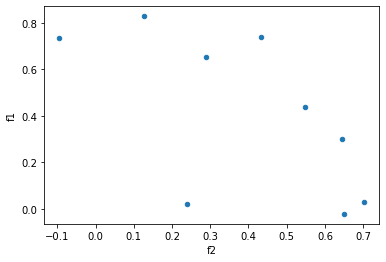

In [103]:
rotated_result.plot.scatter("f2",'f1')

OK, what's different now and what stays the same?

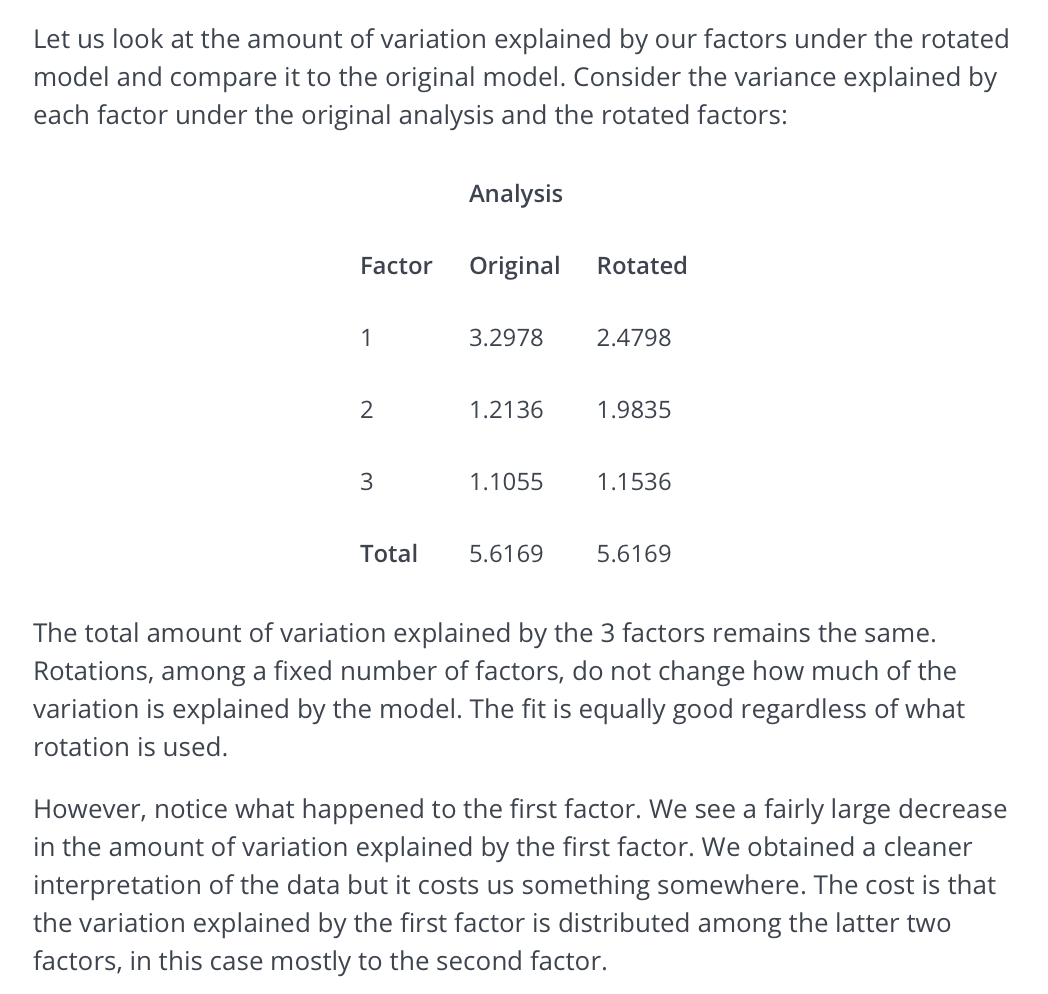

In [108]:
Image("rotation_result.png", width=600, height=600)